<a href="https://colab.research.google.com/github/djatmdgus/Section_2_project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1

In [124]:
### 이곳에서 과제를 진행해 주세요 ### 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', sep=';')
df

In [126]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [128]:
!pip install -U pandas-profiling

In [129]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [130]:
df['y'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)

## 2

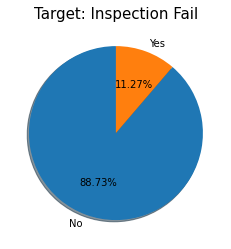

In [131]:
import matplotlib.pyplot as plt
n_zero_label = df['y'].value_counts()[0]
n_one_label = df['y'].value_counts()[1]


plt.pie(
    (n_zero_label, n_one_label),
    labels=('No', 'Yes'),
    autopct="%.2f%%",
    shadow=True,
    startangle=90,
)
plt.title("Target: Inspection Fail", size=15)
plt.show()

In [132]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

은행 고객 데이터

In [133]:
df_data = df.iloc[:, 0:7]
df_data

age          job  marital            education  default housing loan
0       56    housemaid  married             basic.4y       no      no   no
1       57     services  married          high.school  unknown      no   no
2       37     services  married          high.school       no     yes   no
3       40       admin.  married             basic.6y       no      no   no
4       56     services  married          high.school       no      no  yes
...    ...          ...      ...                  ...      ...     ...  ...
41183   73      retired  married  professional.course       no     yes   no
41184   46  blue-collar  married  professional.course       no      no   no
41185   56      retired  married    university.degree       no     yes   no
41186   44   technician  married  professional.course       no      no   no
41187   74      retired  married  professional.course       no     yes   no

[41188 rows x 7 columns]

In [134]:
print('job', df_data['job'].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [135]:
print('marital',df_data['marital'].unique())

marital ['married' 'single' 'divorced' 'unknown']


In [136]:
print('education', df_data['education'].unique())

education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [137]:
print('default',df_data['default'].unique())
print('housing',df_data['housing'].unique())
print('loan',df_data['loan'].unique())

default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']


고객의 나이 

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

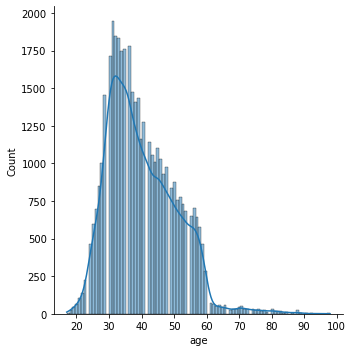

In [91]:
%matplotlib inline
import seaborn as sns

sns.displot(df_data['age'], kde=True);
df_data['age'].describe()


고객의 개인 대출 유무 비율

In [92]:
def pie_chart(df, target):
  n_zero_label = df[target].value_counts()[0]
  n_one_label = df[target].value_counts()[1]
  n_two_label = df[target].value_counts()[2]

  plt.pie(
      (n_zero_label, n_one_label, n_two_label),
      labels=('No', 'Yes', 'unknown'),
      autopct="%.2f%%",
      shadow=True,
      startangle=90,
  )
  plt.title("Target:" + target, size=15)
  return plt.show()

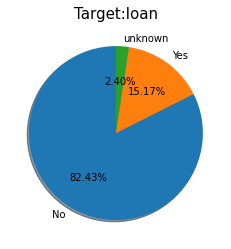

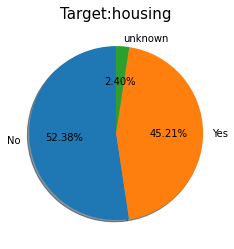

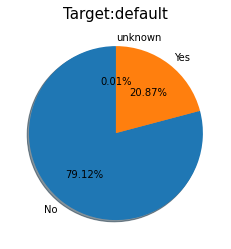

In [93]:
pie_chart(df_data,'loan')
pie_chart(df_data,'housing')
pie_chart(df_data, 'default')

In [94]:
def count_val(df, target):
  fig, ax = plt.subplots()
  fig.set_size_inches(19, 4)
  sns.countplot(x = target, data = df)
  ax.tick_params(labelsize=12)
  return sns.despine()


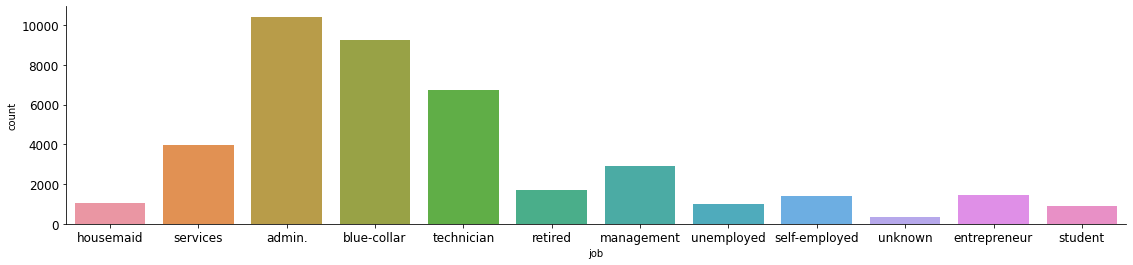

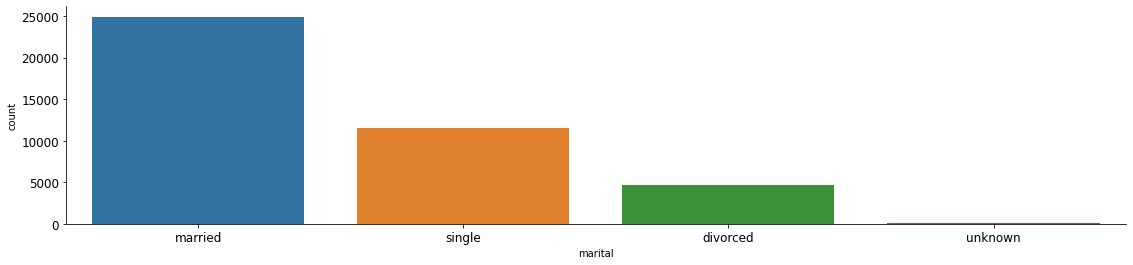

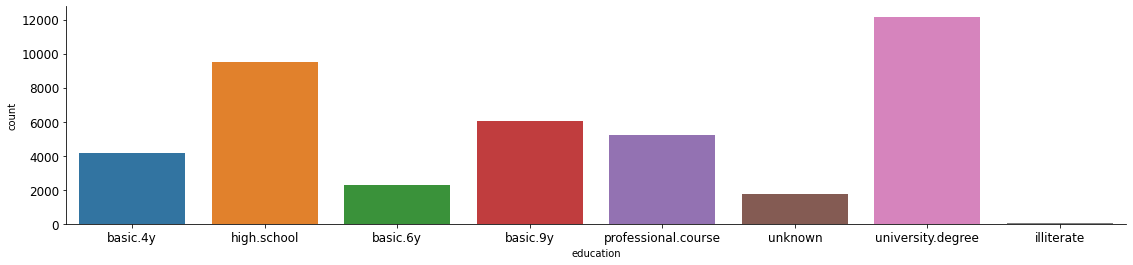

In [95]:
count_val(df_data, 'job')
count_val(df_data, 'marital')
count_val(df_data, 'education')

In [96]:
df_call = df.iloc[:,7:11]
df_call

contact month day_of_week  duration
0      telephone   may         mon       261
1      telephone   may         mon       149
2      telephone   may         mon       226
3      telephone   may         mon       151
4      telephone   may         mon       307
...          ...   ...         ...       ...
41183   cellular   nov         fri       334
41184   cellular   nov         fri       383
41185   cellular   nov         fri       189
41186   cellular   nov         fri       442
41187   cellular   nov         fri       239

[41188 rows x 4 columns]

In [97]:
print('contact', df_call['contact'].unique())
print('month', df_call['month'].unique())
print('day_of_week', df_call['day_of_week'].unique())


contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']


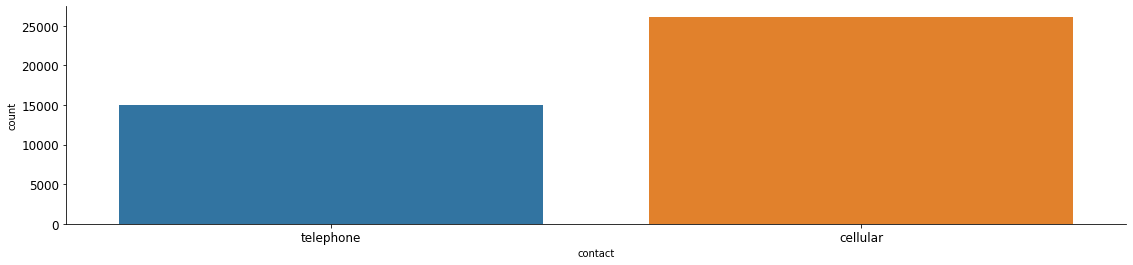

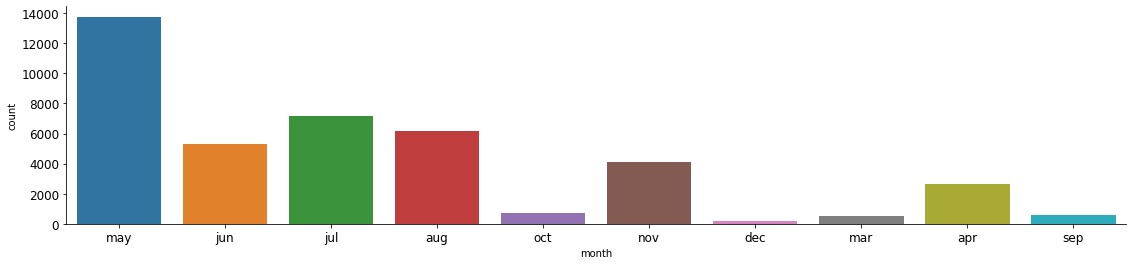

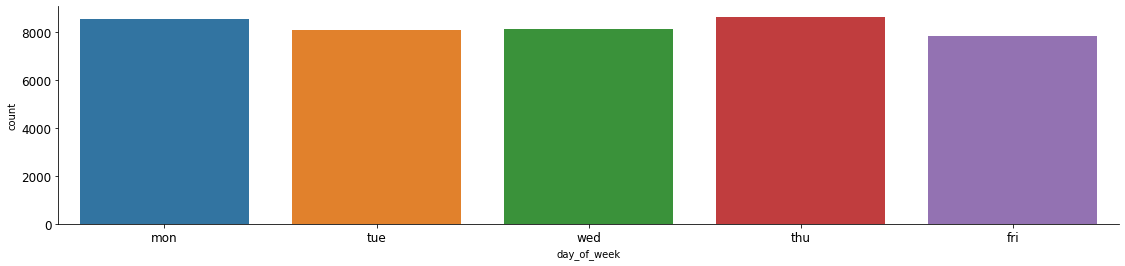

In [98]:
count_val(df_call, 'contact')
count_val(df_call, 'month')
count_val(df_call, 'day_of_week')

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

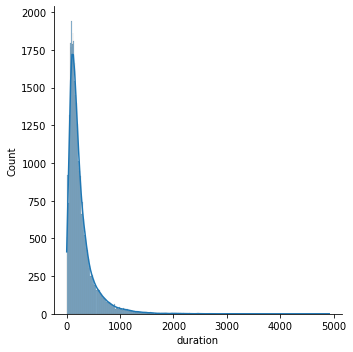

In [99]:
sns.displot(df_call['duration'], kde=True);

df_call['duration'].describe()

기타 속성

In [100]:
df_etc = df.iloc[:, 11:15]
df_etc

campaign  pdays  previous     poutcome
0             1    999         0  nonexistent
1             1    999         0  nonexistent
2             1    999         0  nonexistent
3             1    999         0  nonexistent
4             1    999         0  nonexistent
...         ...    ...       ...          ...
41183         1    999         0  nonexistent
41184         1    999         0  nonexistent
41185         2    999         0  nonexistent
41186         1    999         0  nonexistent
41187         3    999         1      failure

[41188 rows x 4 columns]

캠페인과 연락 된 일수가 오래되었으면 999로 처리됨

In [101]:
print('pdays',df_etc['pdays'].unique())
print('poutcome',df_etc['poutcome'].unique())

pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
poutcome ['nonexistent' 'failure' 'success']


In [102]:
df_social = df.iloc[:,15:20]
df_social

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
...             ...             ...            ...        ...          ...
41183          -1.1          94.767          -50.8      1.028       4963.6
41184          -1.1          94.767          -50.8      1.028       4963.6
41185          -1.1          94.767          -50.8      1.028       4963.6
41186          -1.1          94.767          -50.8      1.028       4963.6
41187          -1.1          94.767          -50.8      1.028       4963.6

[41188 rows x 5 columns]

## 3

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, stratify=df['y'], random_state=10)
train, val = train_test_split(train, train_size=0.75, test_size=0.25, stratify=train['y'], random_state=10)

X_train = train.drop(columns='y')
X_test = test.drop(columns='y')
X_val = val.drop(columns='y')

y_train = train['y']
y_test = test['y']
y_val = val['y']

In [105]:
train.shape, val.shape, test.shape

((24712, 21), (8238, 21), (8238, 21))

In [106]:
!pip install --upgrade category_encoders

In [107]:
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=42)
)

pipe.fit(X_train, y_train)

print(' 훈련  정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

 훈련  정확도:  1.0
테스트 정확도:  0.8918426802621996


In [108]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

정보누수는 없는것 같다

In [109]:
from sklearn.ensemble import RandomForestClassifier

pipe_fores = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10)
)

pipe_fores.fit(X_train, y_train)

print(' 훈련  정확도: ', pipe_fores.score(X_train, y_train))
print('테스트 정확도: ', pipe_fores.score(X_test, y_test))

 훈련  정확도:  1.0
테스트 정확도:  0.913814032532168


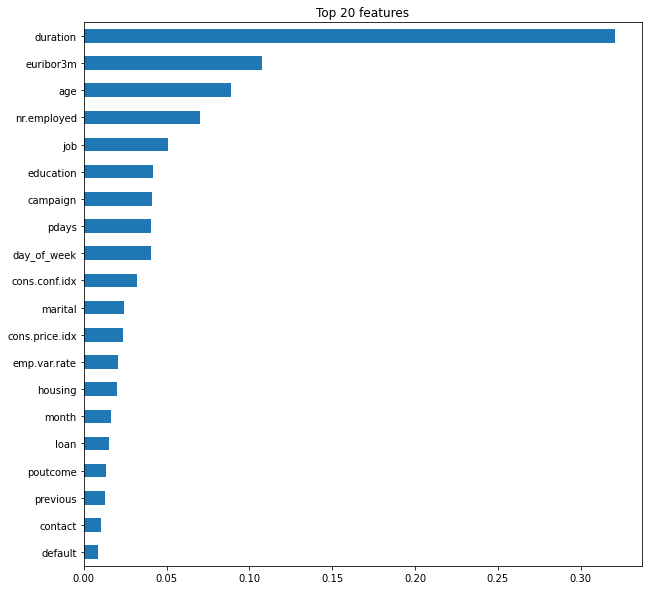

In [110]:
rf = pipe_fores.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [111]:
!pip install eli5

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_fores.named_steps['randomforestclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_fores.named_steps['ordinalencoder'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names= list(X_train.columns) # list 형식으로 넣어야 합니다
)

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but Ran

Text(0.5, 1.0, 'Confusion matrix, n = 8238')

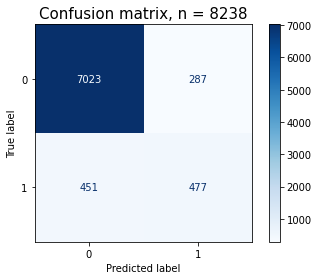

In [114]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_fores, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [115]:
from sklearn.metrics import classification_report
y_pred = pipe_fores.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.62      0.51      0.56       928

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



## 4


In [ ]:
!pip install shap

In [ ]:
pipe_fores.named_steps

In [139]:
y_train.value_counts(normalize=True) 

0    0.887342
1    0.112658
Name: y, dtype: float64

In [140]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    XGBClassifier(random_state=42, n_jobs=-1)
)

pipe.fit(X_train, y_train)

print(' 훈련  정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

 훈련  정확도:  0.9217788928455811
테스트 정확도:  0.9147851420247632


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform



pipeline = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBClassifier(random_state=42, 
                      booster='gbtree', 
                      silent=False,
                      n_jobs=-1)
)
                  
dists = {
        'simpleimputer__strategy': ['mean','median','most_frequent'], 
        'xgbclassifier__n_estimators': randint(20, 200), 
        'xgbclassifier__max_depth': [10, 30, 50, 100],
        'xgbclassifier__min_child_weight': [1, 2, 3, 4, 5],
        'xgbclassifier__learning_rate':  [0.0001, 0.001, 0.1, 1],
        'xgbclassifier__gamma': [0, 0.5, 1, 5],
        'xgbclassifier__reg_alpha': [0.001, 0.1, 1],
        'xgbclassifier__reg_lambda': [0.001, 0.1, 1],
        'xgbclassifier__scale_pos_weight ': [-1, 1, 2, 3]
}

clf = RandomizedSearchCV(
        pipeline, 
        param_distributions=dists, 
        n_iter=10, 
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
)

clf.fit(X_train, y_train)



In [147]:
print("Optimal Hyperparameter:", clf.best_params_)
print("accuracy:", clf.best_score_)

Optimal Hyperparameter: {'simpleimputer__strategy': 'mean', 'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 50, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__n_estimators': 95, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__scale_pos_weight ': 3}
accuracy: 0.9172873796488386


In [184]:
clf.best_params_

{'simpleimputer__strategy': 'mean',
 'xgbclassifier__gamma': 5,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 50,
 'xgbclassifier__min_child_weight': 2,
 'xgbclassifier__n_estimators': 95,
 'xgbclassifier__reg_alpha': 1,
 'xgbclassifier__reg_lambda': 1,
 'xgbclassifier__scale_pos_weight ': 3}

In [187]:
from sklearn.pipeline import Pipeline
pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('xgbc', XGBClassifier(n_estimators=95, strategy='mean', gamma=5, learning_rate=0.1, max_depth=50, min_child_weight=2, reg_alpha=1, reg_lambda=1, scale_pos_weight=3, random_state=42, booster='gbtree', silent=False, n_jobs=-1)) 
])

In [189]:
pipe_.fit(X_train, y_train)
print('테스트 정확도: ', pipe_.score(X_train, y_train))

테스트 정확도:  0.9620427322758174


In [164]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['xgbc'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_test을 사용합니다.
X_val_transformed = pipe_.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val); 

In [165]:

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=list(X_val.columns) # list 형식으로 넣어야 합니다
) 

Text(0.5, 1.0, 'Confusion matrix, n = 8238')

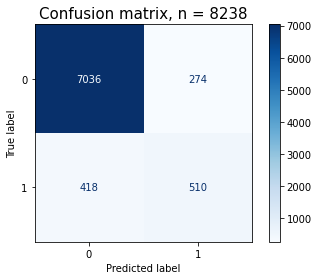

In [168]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [169]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.65      0.55      0.60       928

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [171]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.9507467923015237


Text(0, 0.5, 'TPR')

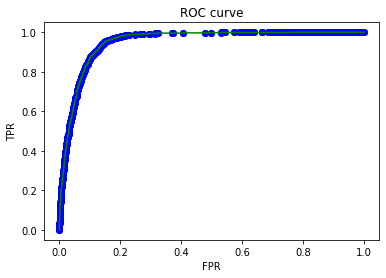

In [172]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
!pip install shap

In [175]:
df_p = pd.DataFrame({
    'pred_proba': y_pred_proba, # 예측확률 
    'status_group': y_test # 실제값
})

df_p = pd.merge(df_p, X_test, left_index=True, right_index=True, how='left')

In [176]:
pred_True = df_p['status_group'] == True
pred_False = ~pred_True
right = (pred_True) == (df_p['pred_proba'] > 0.50)
wrong = ~right

In [177]:
df_p[pred_True & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

pred_proba  status_group  age           job   marital  \
36334    0.503392             1   40        admin.    single   
40373    0.517700             1   18       student    single   
36909    0.592798             1   50        admin.   married   
22804    0.627325             1   35    management  divorced   
36562    0.666129             1   69  entrepreneur   married   
39741    0.723181             1   29      services    single   
14805    0.743545             1   34        admin.   married   
27855    0.785476             1   29    technician    single   
40740    0.905237             1   33    technician   married   
28132    0.905317             1   53   blue-collar   married   

                 education  default housing loan    contact  ... duration  \
36334          high.school       no     yes   no   cellular  ...      145   
40373              unknown       no     yes   no   cellular  ...      253   
36909    university.degree       no      no   no   cellular  ...      269   
22804    university.degree       no      no   no   cellular  ...      472   
36562          high.school       no      no   no   cellular  ...      140   
39741          high.school       no     yes   no  telephone  ...       93   
14805    university.degree       no     yes   no   cellular  ...      686   
27855  professional.course       no      no   no   cellular  ...      299   
40740    university.degree       no      no   no   cellular  ...      216   
28132             basic.4y  unknown     yes   no   cellular  ...      583   

      campaign  pdays  previous     poutcome  emp.var.rate cons.price.idx  \
36334        1    999         0  nonexistent          -2.9         92.963   
40373        2      6         1      success          -1.7         94.027   
36909        1      3         1      success          -2.9         92.963   
22804        3    999         0  nonexistent           1.4         93.444   
36562        2    999         0  nonexistent          -2.9         92.963   
39741        1    999         0  nonexistent          -1.8         93.876   
14805        6    999         0  nonexistent           1.4         93.918   
27855        2    999         0  nonexistent          -1.8         92.843   
40740        1    999         0  nonexistent          -1.1         94.199   
28132        2    999         1      failure          -1.8         93.075   

       cons.conf.idx  euribor3m  nr.employed  
36334          -40.8      1.262       5076.2  
40373          -38.3      0.900       4991.6  
36909          -40.8      1.215       5076.2  
22804          -36.1      4.965       5228.1  
36562          -40.8      1.260       5076.2  
39741          -40.0      0.699       5008.7  
14805          -42.7      4.957       5228.1  
27855          -50.0      1.614       5099.1  
40740          -37.5      0.876       4963.6  
28132          -47.1      1.466       5099.1  

[10 rows x 22 columns]

In [179]:
row = X_test.loc[[28132]]
row

age          job  marital education  default housing loan   contact  \
28132   53  blue-collar  married  basic.4y  unknown     yes   no  cellular   

      month day_of_week  duration  campaign  pdays  previous poutcome  \
28132   apr         mon       583         2    999         1  failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
28132          -1.8          93.075          -47.1      1.466       5099.1

In [190]:
import xgboost
import shap

explainer = shap.TreeExplainer(pipe_.named_steps['xgbc'])
row_processed = pipe_.named_steps['preprocessing'].transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [199]:
def explain(row_number):
    positive_class = True
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.loc[[row_number]]
    row_processed = pipe_.named_steps['preprocessing'].transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = pipe_.named_steps['xgbc'].predict(row_processed)[0]
    pred_proba = pipe_.named_steps['xgbc'].predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 고객에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print()
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print()
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [200]:
explain(28132)

이 고객에 대한 예측결과는 0 으로, 확률은 83% 입니다.

Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. euribor3m : 1.466
2. nr.employed : 5099.1
3. poutcome : failure

Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. duration : 583
2. cons.conf.idx : -47.1
3. emp.var.rate : -1.8
